# 📈 Advanced Financial Analysis & Portfolio Optimization

### 🎯 **Project Overview**
This notebook demonstrates professional financial analysis techniques used at top investment banks including:
- **Portfolio Optimization** using Modern Portfolio Theory
- **Risk Management** with VaR and volatility analysis  
- **Market Analysis** using CAPM and Beta calculations
- **Interactive Visualizations** Executive-ready dashboards and summaries
- **Performance Attribution** Sector-based analysis and benchmarking

##  🛠️ Environment Setup & Dependencies
### Setting up the quantitative finance environment with essential libraries for data analysis, statistical computing, and professional visualizations.

In [5]:
!pip install yfinance

Defaulting to user installation because normal site-packages is not writeable


In [6]:
import yfinance as yf         
import pandas as pd           
import numpy as np            
import matplotlib.pyplot as plt 
import seaborn as sns         
import plotly.graph_objects as go
import plotly.express as px   
from scipy import stats       
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
plt.style.use('seaborn-v0_8')

## 📈 Market Data Collection & Processing
### Implementing systematic data collection methodology for multi-asset analysis. Using programmatic APIs to gather real-time market data across diverse asset classes for comprehensive portfolio analysis.

In [7]:
tickers = ['AAPL', 'GOOGL', 'MSFT', 'AMZN', 'TSLA', 'JPM', 'GS', 'BLK']

start_date = '2022-01-01'
end_date = '2024-01-01'

print("📈 Downloading stock data...")

stock_data = {}

for ticker in tickers:
    print(f"Fetching {ticker}...")  
    stock_data[ticker] = yf.download(ticker, start=start_date, end=end_date)
    # yf.download gets: Open, High, Low, Close, Volume, Adjusted Close prices
    
print("✅ Data download complete!")

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

📈 Downloading stock data...
Fetching AAPL...
Fetching GOOGL...
Fetching MSFT...
Fetching AMZN...
Fetching TSLA...
Fetching JPM...



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Fetching GS...
Fetching BLK...
✅ Data download complete!


## 💹 Master Dataset Construction
### Creating the foundation dataset by extracting adjusted closing prices and performing data quality validation. Adjusted prices account for corporate actions (splits, dividends) ensuring analytical accuracy.

In [8]:
closing_prices = pd.DataFrame()

for ticker in tickers:
  
    closing_prices[ticker] = stock_data[ticker]['Close']
    

print("🔍 First 5 days of stock prices:")
print(closing_prices.head())


print(f"\n📊 Data shape: {closing_prices.shape}")
print(f"Missing values per stock:")
print(closing_prices.isnull().sum())

🔍 First 5 days of stock prices:
                  AAPL       GOOGL        MSFT        AMZN        TSLA  \
Date                                                                     
2022-01-03  178.645630  144.301590  325.038025  170.404495  399.926666   
2022-01-04  176.378342  143.712418  319.464630  167.522003  383.196655   
2022-01-05  171.686707  137.119446  307.201019  164.356995  362.706665   
2022-01-06  168.820663  137.092072  304.773560  163.253998  354.899994   
2022-01-07  168.987534  136.365051  304.928925  162.554001  342.320007   

                   JPM          GS         BLK  
Date                                            
2022-01-03  146.995804  360.908417  836.973572  
2022-01-04  152.568390  372.000519  842.013550  
2022-01-05  149.779144  363.921082  818.650085  
2022-01-06  151.370392  362.369049  822.065125  
2022-01-07  152.870148  362.898590  819.109192  

📊 Data shape: (501, 8)
Missing values per stock:
AAPL     0
GOOGL    0
MSFT     0
AMZN     0
TSLA     0
J

# 📊 Basic Financial Analysis 

## 📊 Daily Returns Analysis
### **💡 Key Concepts Explained:**

**Daily Returns:** Computing daily logarithmic returns - the fundamental building block of quantitative finance. Daily returns enable portfolio performance measurement, risk assessment, and statistical modeling essential for institutional analysis.
Key Metric: Daily Return = (P_t - P_{t-1}) / P_{t-1}
- Formula: `(Today's Price - Yesterday's Price) / Yesterday's Price`


In [9]:

daily_returns = closing_prices.pct_change()

daily_returns = daily_returns.dropna()

print("📈 Daily Returns Sample:")
print(daily_returns.head())


📈 Daily Returns Sample:
                AAPL     GOOGL      MSFT      AMZN      TSLA       JPM  \
Date                                                                     
2022-01-04 -0.012692 -0.004083 -0.017147 -0.016916 -0.041833  0.037910   
2022-01-05 -0.026600 -0.045876 -0.038388 -0.018893 -0.053471 -0.018282   
2022-01-06 -0.016693 -0.000200 -0.007902 -0.006711 -0.021523  0.010624   
2022-01-07  0.000988 -0.005303  0.000510 -0.004288 -0.035447  0.009908   
2022-01-10  0.000116  0.012060  0.000732 -0.006570  0.030342  0.000958   

                  GS       BLK  
Date                            
2022-01-04  0.030734  0.006022  
2022-01-05 -0.021719 -0.027747  
2022-01-06 -0.004265  0.004172  
2022-01-07  0.001461 -0.003596  
2022-01-10  0.004176 -0.021215  


## 🎢 Volatility & Risk Measurement

**Volatility:** Calculating annualized volatility using statistical scaling properties. Volatility quantifies asset risk and is crucial for position sizing, risk management, and regulatory capital calculations in financial institutions.

**Formula: σ_annual = σ_daily × √252**

🎢 Stock Volatility (Annual %):
AAPL: 29.08%
GOOGL: 34.88%
MSFT: 30.73%
AMZN: 42.57%
TSLA: 60.17%
JPM: 25.71%
GS: 26.89%
BLK: 30.38%


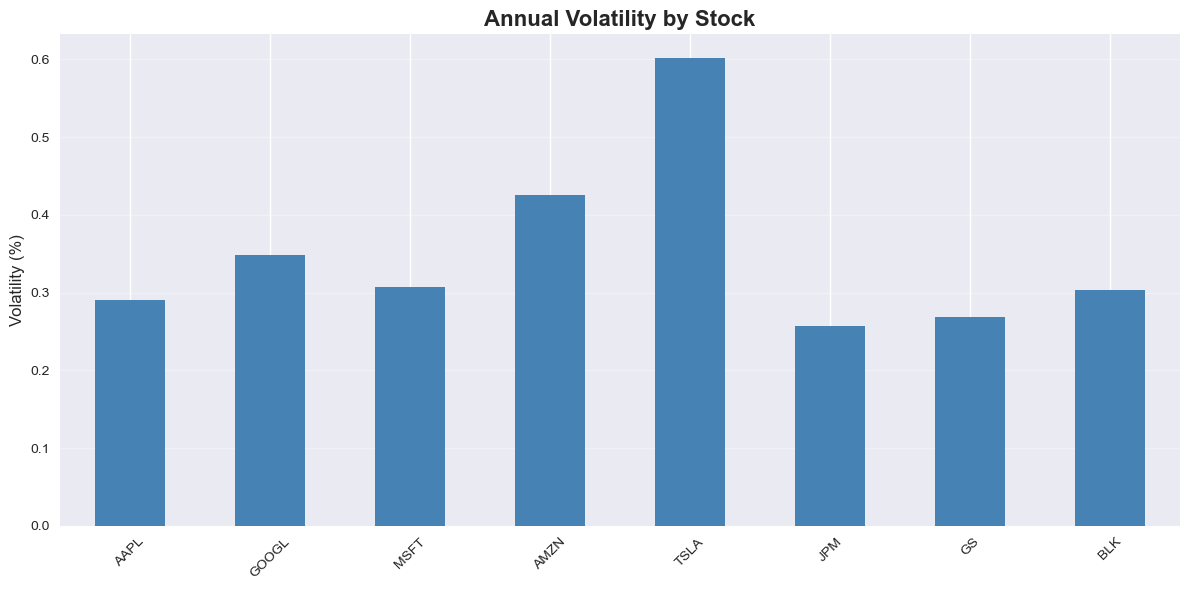

In [10]:
# Calculate annualized volatility - measures risk
volatility = daily_returns.std() * np.sqrt(252)

print("🎢 Stock Volatility (Annual %):")
for ticker in tickers:
    print(f"{ticker}: {volatility[ticker]:.2%}")

# Create volatility comparison chart
plt.figure(figsize=(12, 6))
volatility_plot = volatility.plot(kind='bar', color='steelblue')
plt.title('Annual Volatility by Stock', fontsize=16, fontweight='bold')
plt.ylabel('Volatility (%)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

## 📈 Technical Analysis - Moving Averages
### Implementing trend analysis using simple moving averages. Technical indicators help identify momentum patterns and trend reversals, supporting systematic trading strategies and market timing decisions.

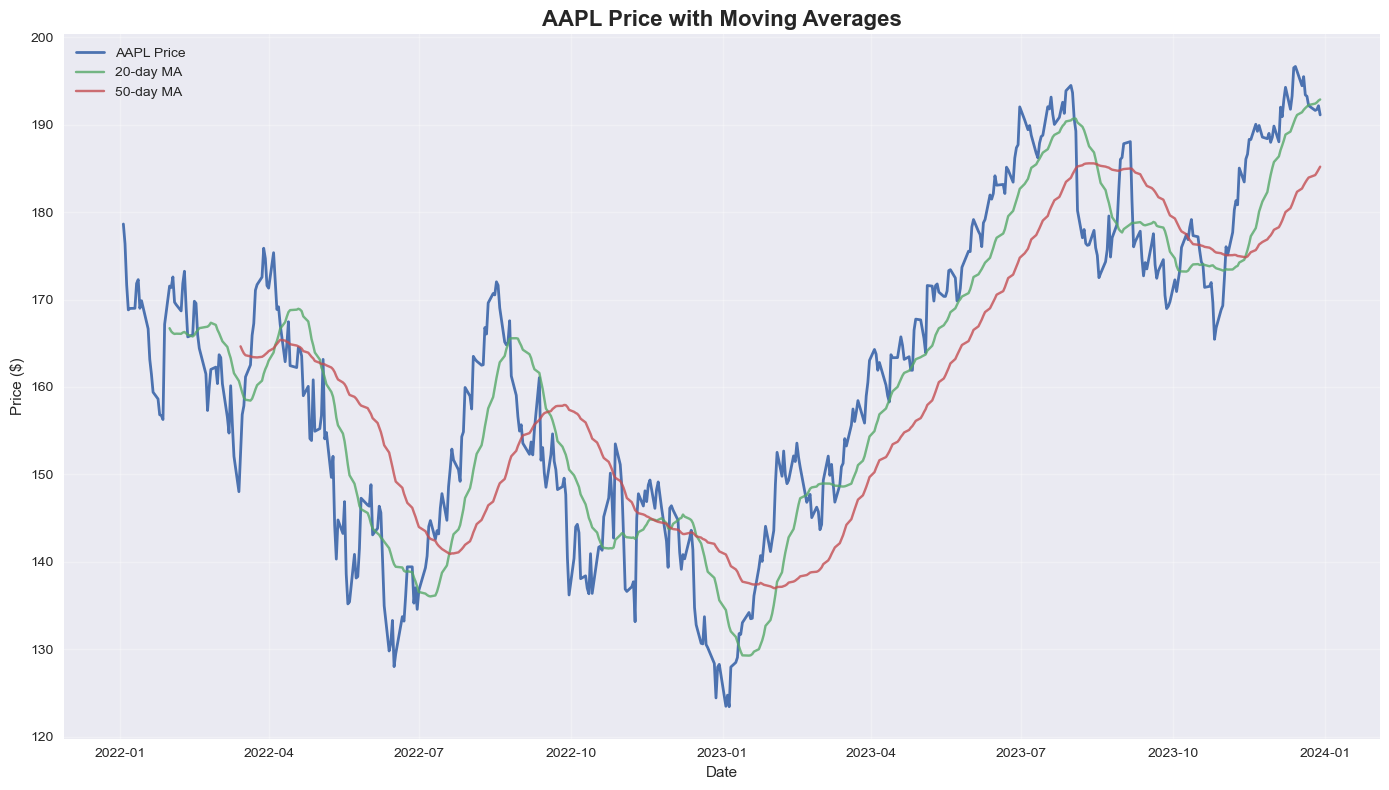

In [11]:

window_short = 20  # 20-day MA (about 1 month)
window_long = 50   # 50-day MA (about 2.5 months)

moving_averages = pd.DataFrame()
for ticker in tickers:
    moving_averages[f'{ticker}_20MA'] = closing_prices[ticker].rolling(window=window_short).mean()
    moving_averages[f'{ticker}_50MA'] = closing_prices[ticker].rolling(window=window_long).mean()

plt.figure(figsize=(14, 8))
plt.plot(closing_prices.index, closing_prices['AAPL'], label='AAPL Price', linewidth=2)
plt.plot(moving_averages.index, moving_averages['AAPL_20MA'], label='20-day MA', alpha=0.8)
plt.plot(moving_averages.index, moving_averages['AAPL_50MA'], label='50-day MA', alpha=0.8)
plt.title('AAPL Price with Moving Averages', fontsize=16, fontweight='bold')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## 🎯 Portfolio Construction & Optimization

### Building equal-weighted portfolio and calculating key performance metrics. Portfolio theory application demonstrating diversification benefits and systematic approach to asset allocation.
**Metrics: Annual Return | Volatility | Sharpe Ratio**

In [12]:
weights = np.array([1/len(tickers)] * len(tickers))  
print(f"Portfolio weights: {dict(zip(tickers, weights))}")

portfolio_returns = (daily_returns * weights).sum(axis=1)

portfolio_annual_return = portfolio_returns.mean() * 252
portfolio_annual_volatility = portfolio_returns.std() * np.sqrt(252)
sharpe_ratio = portfolio_annual_return / portfolio_annual_volatility

print(f"\n📊 Portfolio Performance:")
print(f"Annual Return: {portfolio_annual_return:.2%}")
print(f"Annual Volatility: {portfolio_annual_volatility:.2%}")
print(f"Sharpe Ratio: {sharpe_ratio:.3f}")

Portfolio weights: {'AAPL': 0.125, 'GOOGL': 0.125, 'MSFT': 0.125, 'AMZN': 0.125, 'TSLA': 0.125, 'JPM': 0.125, 'GS': 0.125, 'BLK': 0.125}

📊 Portfolio Performance:
Annual Return: 4.56%
Annual Volatility: 27.14%
Sharpe Ratio: 0.168


## ⚖️ Risk-Return Analysis
### Conducting comprehensive risk-return profiling across assets. This analysis forms the foundation of modern portfolio theory and helps identify optimal investment opportunities based on risk-adjusted returns.

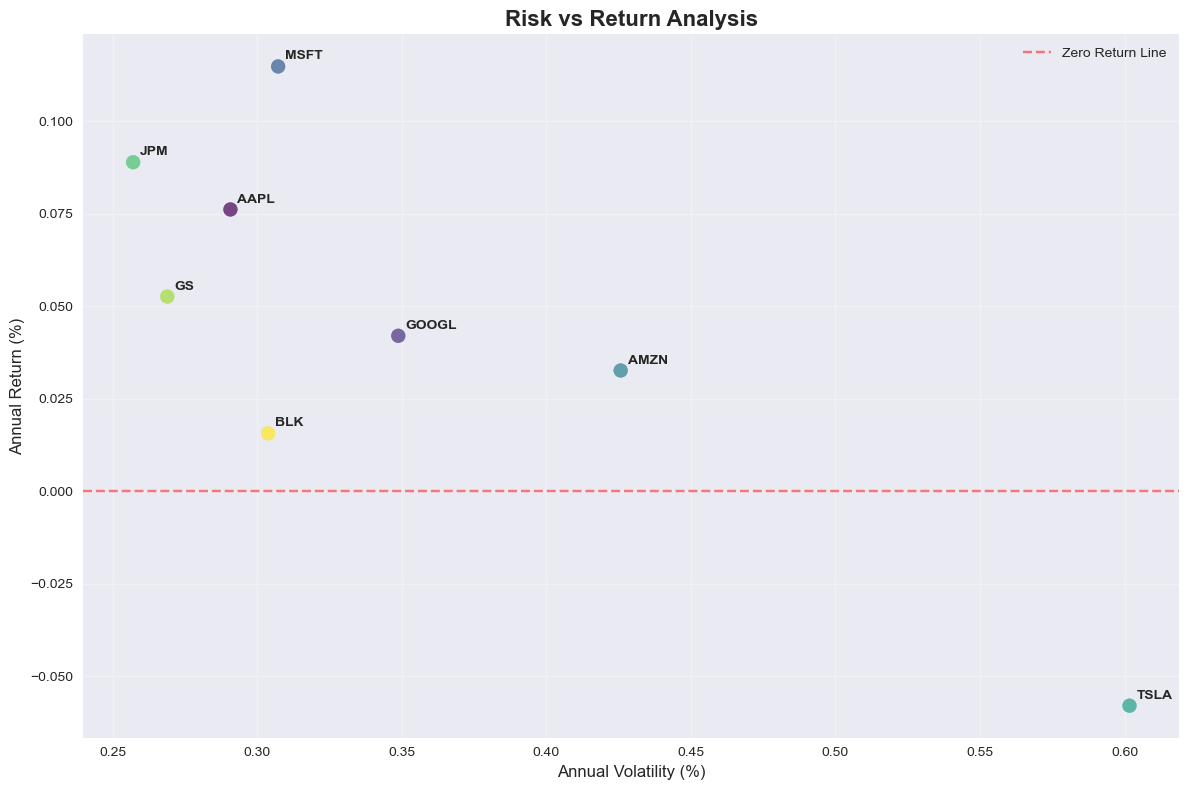

In [13]:
annual_returns = daily_returns.mean() * 252
annual_volatilities = daily_returns.std() * np.sqrt(252)

# Create risk-return scatter plot
plt.figure(figsize=(12, 8))
scatter = plt.scatter(annual_volatilities, annual_returns, 
                     s=100, alpha=0.7, c=range(len(tickers)), cmap='viridis')

for i, ticker in enumerate(tickers):
    plt.annotate(ticker, (annual_volatilities[ticker], annual_returns[ticker]),
                xytext=(5, 5), textcoords='offset points', fontweight='bold')

plt.xlabel('Annual Volatility (%)', fontsize=12)
plt.ylabel('Annual Return (%)', fontsize=12)
plt.title('Risk vs Return Analysis', fontsize=16, fontweight='bold')
plt.grid(True, alpha=0.3)

plt.axhline(y=0, color='red', linestyle='--', alpha=0.5, label='Zero Return Line')
plt.legend()
plt.tight_layout()
plt.show()

## 🔗 Correlation Matrix & Diversification Analysis
### Analyzing asset correlations to quantify diversification benefits. Correlation analysis is essential for risk management, identifying concentration risk, and optimizing portfolio construction for maximum diversification.

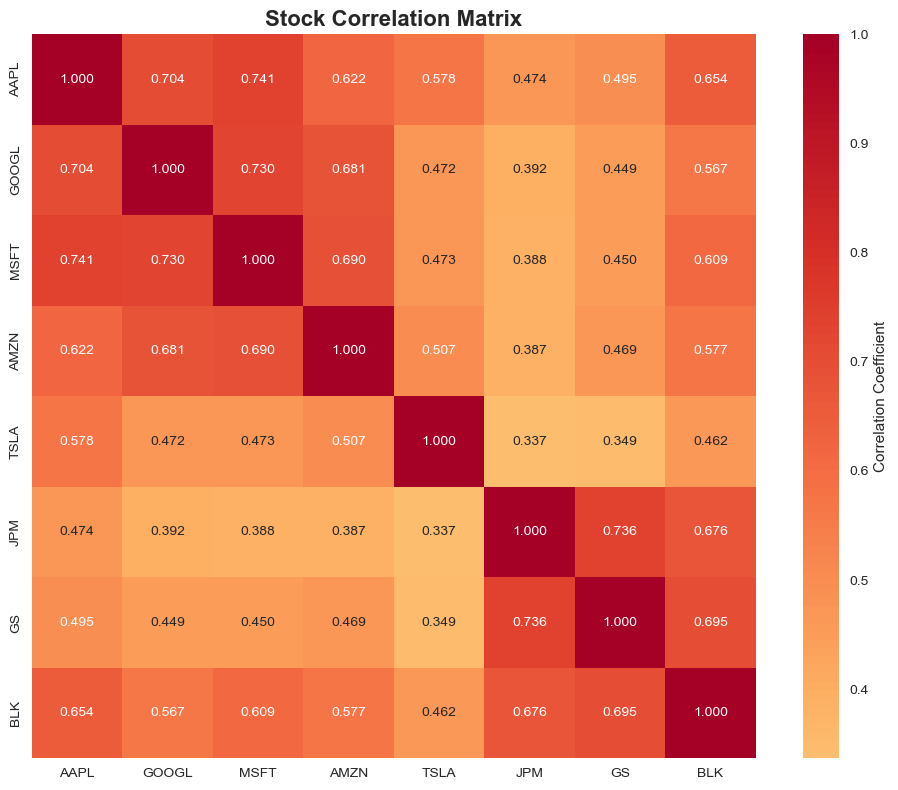


🔗 Highest Correlations:
AAPL - GOOGL: 0.704
AAPL - MSFT: 0.741
GOOGL - MSFT: 0.730
JPM - GS: 0.736


In [14]:
correlation_matrix = daily_returns.corr()


plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(correlation_matrix, 
                      annot=True, 
                      cmap='RdYlBu_r', 
                      center=0, 
                      square=True,  
                      fmt='.3f', 
                      cbar_kws={'label': 'Correlation Coefficient'})

plt.title('Stock Correlation Matrix', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()


print("\n🔗 Highest Correlations:")
# Get upper triangle of correlation matrix
upper_triangle = correlation_matrix.where(
    np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))


high_corr_pairs = []
for col in upper_triangle.columns:
    for idx in upper_triangle.index:
        if pd.notna(upper_triangle.loc[idx, col]) and abs(upper_triangle.loc[idx, col]) > 0.7:
            high_corr_pairs.append((idx, col, upper_triangle.loc[idx, col]))

for pair in high_corr_pairs:
    print(f"{pair[0]} - {pair[1]}: {pair[2]:.3f}")

## 🔄 Sector Rotation & Performance Attribution
### Implementing sector-based performance analysis to identify rotation opportunities. Sector analysis enables tactical asset allocation and helps understand performance drivers across different market segments.

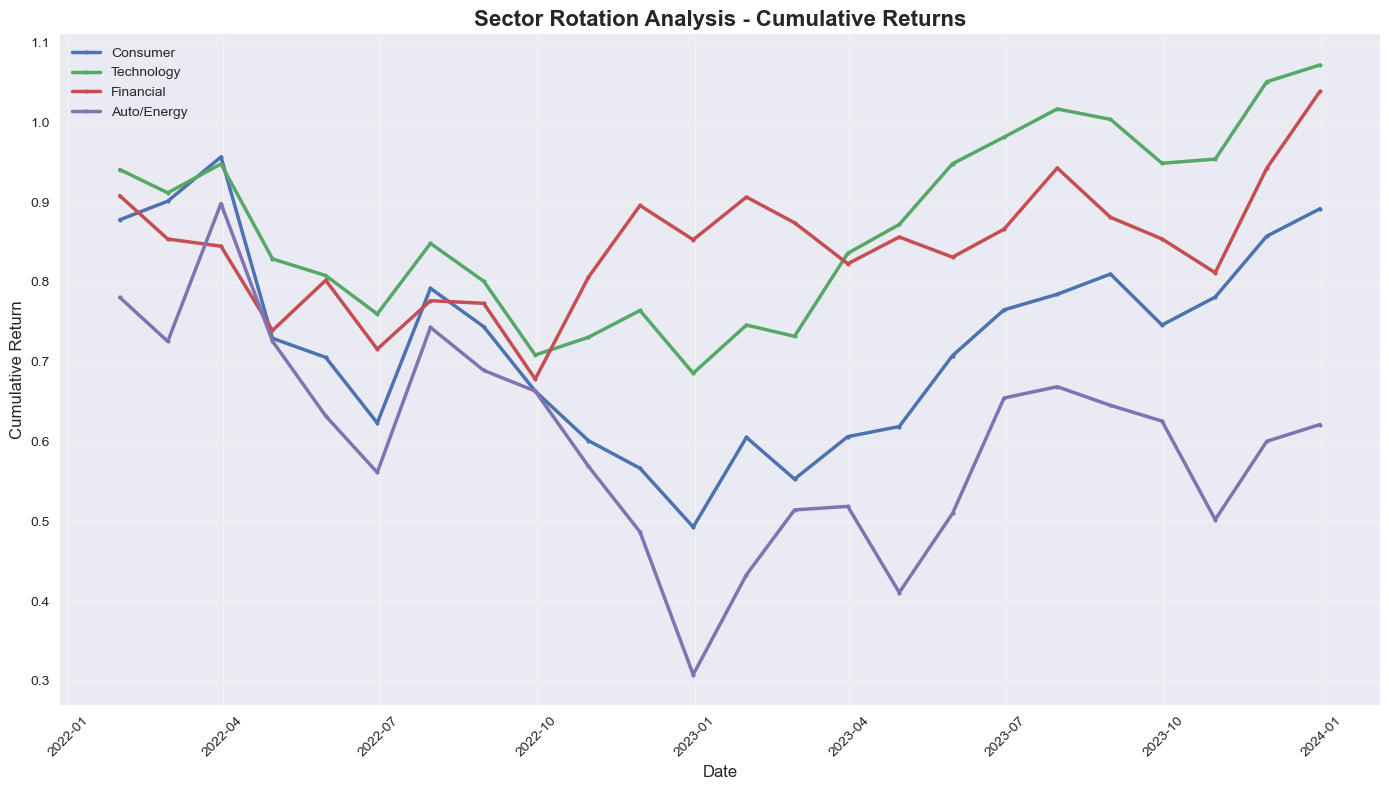


🔄 Sector Performance Rankings (Last 6 months):
1. Financial: 3.44%
2. Consumer: 2.73%
3. Technology: 1.59%
4. Auto/Energy: -0.18%


In [15]:
sectors = {
    'AAPL': 'Technology', 'GOOGL': 'Technology', 'MSFT': 'Technology',
    'AMZN': 'Consumer', 'TSLA': 'Auto/Energy',
    'JPM': 'Financial', 'GS': 'Financial', 'BLK': 'Financial'
}

monthly_returns = daily_returns.resample('M').apply(lambda x: (1 + x).prod() - 1)

# Group by sectors
sector_returns = pd.DataFrame()
for sector in set(sectors.values()):
    sector_stocks = [ticker for ticker, sec in sectors.items() if sec == sector]
    if len(sector_stocks) > 1:
        
        sector_returns[sector] = monthly_returns[sector_stocks].mean(axis=1)
    else:
        sector_returns[sector] = monthly_returns[sector_stocks[0]]


plt.figure(figsize=(14, 8))
cumulative_sector_returns = (1 + sector_returns).cumprod()

for sector in sector_returns.columns:
    plt.plot(cumulative_sector_returns.index, cumulative_sector_returns[sector], 
             label=sector, linewidth=2.5, marker='o', markersize=3)

plt.title('Sector Rotation Analysis - Cumulative Returns', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Cumulative Return', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


print("\n🔄 Sector Performance Rankings (Last 6 months):")
recent_performance = sector_returns.tail(6).mean().sort_values(ascending=False)
for i, (sector, performance) in enumerate(recent_performance.items(), 1):
    print(f"{i}. {sector}: {performance:.2%}")

## ⚡ Volatility Clustering Analysis
### Advanced volatility modeling using rolling windows to identify clustering patterns. Volatility clustering is crucial for option pricing, risk management, and understanding market microstructure dynamics.

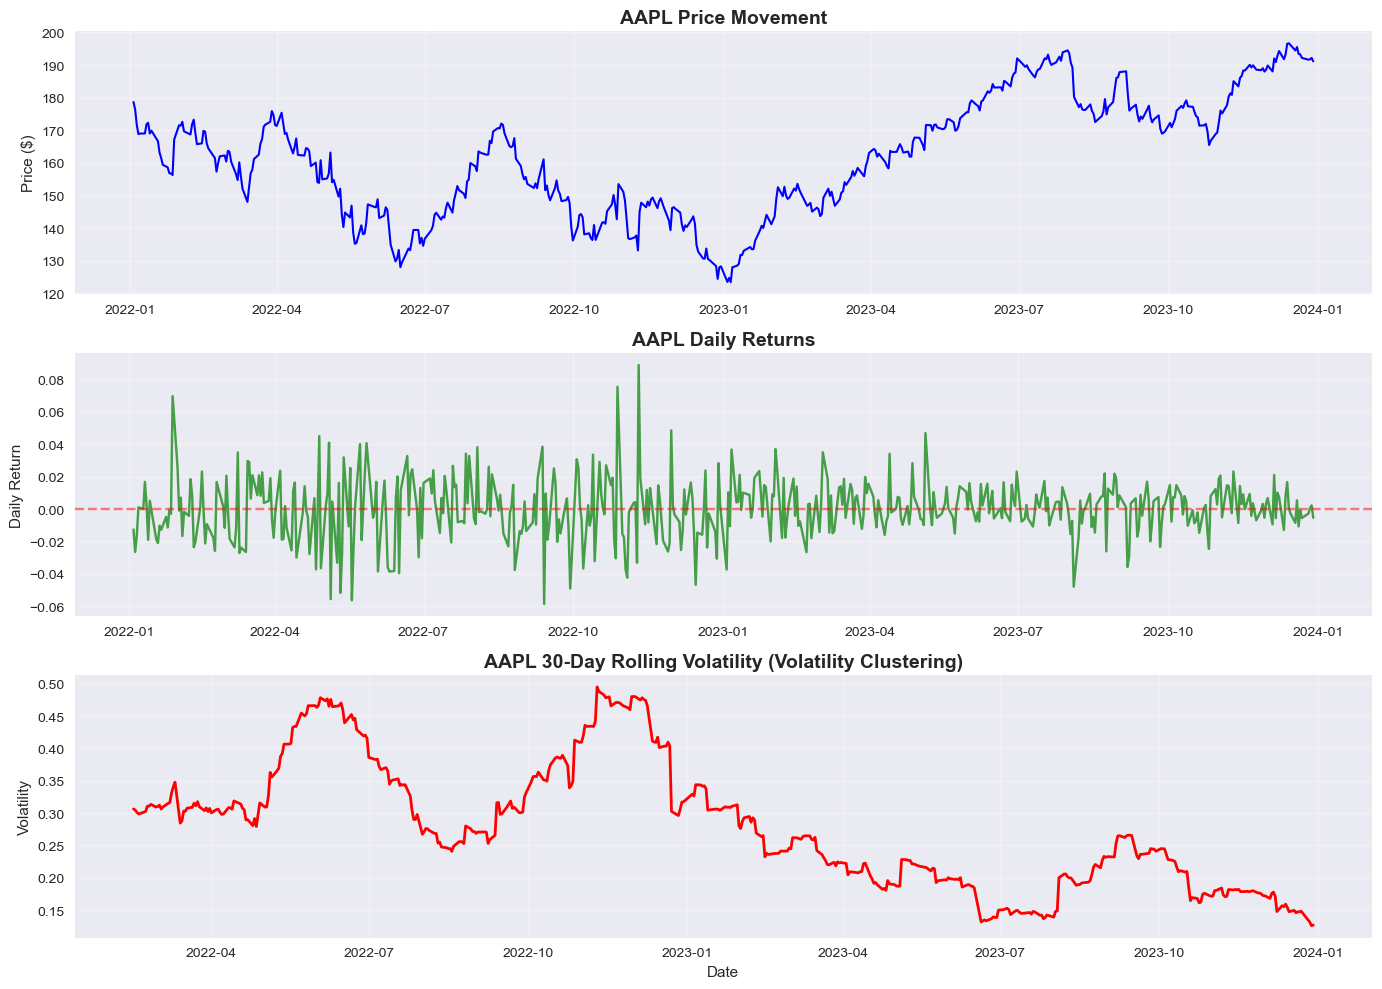


⚡ High Volatility Periods for AAPL (>35.64%):
Number of high volatility days: 94
Top 5 highest volatility periods:
Date
2022-11-10    0.495167
2022-11-11    0.488428
2022-11-14    0.482571
2022-12-02    0.480236
2022-11-30    0.480230
Name: AAPL, dtype: float64


In [16]:
rolling_vol = daily_returns.rolling(window=30).std() * np.sqrt(252)


plt.figure(figsize=(14, 10))

plt.subplot(3, 1, 1)
plt.plot(closing_prices.index, closing_prices['AAPL'], color='blue', linewidth=1.5)
plt.title('AAPL Price Movement', fontsize=14, fontweight='bold')
plt.ylabel('Price ($)')
plt.grid(True, alpha=0.3)


plt.subplot(3, 1, 2)
plt.plot(daily_returns.index, daily_returns['AAPL'], color='green', alpha=0.7)
plt.title('AAPL Daily Returns', fontsize=14, fontweight='bold')
plt.ylabel('Daily Return')
plt.axhline(y=0, color='red', linestyle='--', alpha=0.5)
plt.grid(True, alpha=0.3)


plt.subplot(3, 1, 3)
plt.plot(rolling_vol.index, rolling_vol['AAPL'], color='red', linewidth=2)
plt.title('AAPL 30-Day Rolling Volatility (Volatility Clustering)', fontsize=14, fontweight='bold')
plt.ylabel('Volatility')
plt.xlabel('Date')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Identify high volatility periods
high_vol_threshold = rolling_vol['AAPL'].quantile(0.8)  # Top 20% volatility periods
high_vol_periods = rolling_vol['AAPL'][rolling_vol['AAPL'] > high_vol_threshold]

print(f"\n⚡ High Volatility Periods for AAPL (>{high_vol_threshold:.2%}):")
print(f"Number of high volatility days: {len(high_vol_periods)}")
print("Top 5 highest volatility periods:")
print(high_vol_periods.nlargest(5))

## 📊 Beta Analysis & Market Sensitivity
### Computing systematic risk (Beta) using Capital Asset Pricing Model (CAPM). Beta analysis quantifies market sensitivity and is fundamental for portfolio risk assessment and hedge ratio calculations.
**CAPM: R_i = α + β × R_market + ε**

[*********************100%***********************]  1 of 1 completed


Stock returns shape: (500, 8)
Market returns shape: (500,)
Market returns type: <class 'pandas.core.series.Series'>
Stock returns type: <class 'pandas.core.frame.DataFrame'>
Debug AAPL: Market array shape: (500,), Stock array shape: (500,)
Debug GOOGL: Market array shape: (500,), Stock array shape: (500,)
Debug MSFT: Market array shape: (500,), Stock array shape: (500,)
Debug AMZN: Market array shape: (500,), Stock array shape: (500,)
Debug TSLA: Market array shape: (500,), Stock array shape: (500,)
Debug JPM: Market array shape: (500,), Stock array shape: (500,)
Debug GS: Market array shape: (500,), Stock array shape: (500,)
Debug BLK: Market array shape: (500,), Stock array shape: (500,)


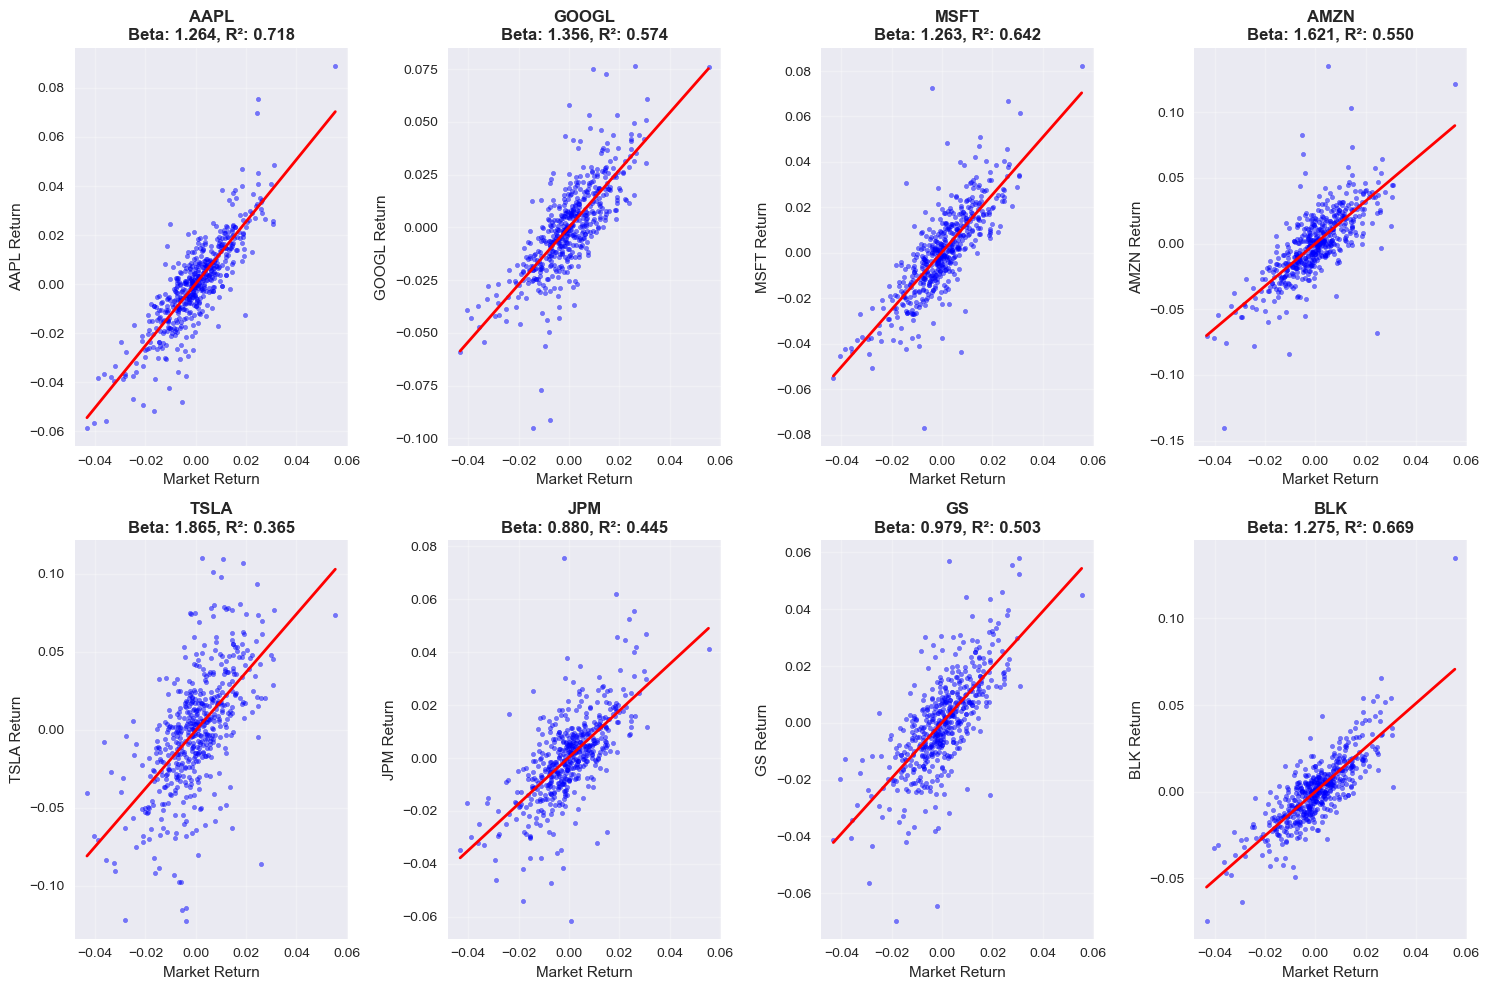


📊 Beta Analysis Results:
AAPL   | Beta:  1.264 | R²: 0.718 | More volatile than market
GOOGL  | Beta:  1.356 | R²: 0.574 | More volatile than market
MSFT   | Beta:  1.263 | R²: 0.642 | More volatile than market
AMZN   | Beta:  1.621 | R²: 0.550 | More volatile than market
TSLA   | Beta:  1.865 | R²: 0.365 | More volatile than market
JPM    | Beta:  0.880 | R²: 0.445 | Less volatile than market
GS     | Beta:  0.979 | R²: 0.503 | Less volatile than market
BLK    | Beta:  1.275 | R²: 0.669 | More volatile than market

🎯 Portfolio Beta: 1.313
Portfolio is MORE risky than the market


In [17]:

market_data = yf.download('^GSPC', start=start_date, end=end_date)
market_returns = market_data['Close'].pct_change().dropna()


if isinstance(market_returns, pd.DataFrame):
    market_returns = market_returns.iloc[:, 0]


common_dates = daily_returns.index.intersection(market_returns.index)
stock_returns_aligned = daily_returns.loc[common_dates]
market_returns_aligned = market_returns.loc[common_dates]


print(f"Stock returns shape: {stock_returns_aligned.shape}")
print(f"Market returns shape: {market_returns_aligned.shape}")
print(f"Market returns type: {type(market_returns_aligned)}")
print(f"Stock returns type: {type(stock_returns_aligned)}")


betas = {}
r_squared = {}
plt.figure(figsize=(15, 10))

for i, ticker in enumerate(tickers, 1):
    # Ensure we have the ticker in our data
    if ticker not in stock_returns_aligned.columns:
        print(f"Warning: {ticker} not found in stock data")
        continue
    
    
    stock_ret = stock_returns_aligned[ticker].dropna()
    market_ret = market_returns_aligned.dropna()
    
   
    common_idx = stock_ret.index.intersection(market_ret.index)
    stock_ret_clean = stock_ret.loc[common_idx]
    market_ret_clean = market_ret.loc[common_idx]
    
    
    if len(stock_ret_clean) < 30:
        print(f"Warning: Not enough data points for {ticker} ({len(stock_ret_clean)} points)")
        continue
    
    try:
        # Ensure both arrays are 1D
        market_array = market_ret_clean.values.flatten() if hasattr(market_ret_clean.values, 'flatten') else market_ret_clean.values
        stock_array = stock_ret_clean.values.flatten() if hasattr(stock_ret_clean.values, 'flatten') else stock_ret_clean.values
        
        # Debug: Check array shapes
        print(f"Debug {ticker}: Market array shape: {market_array.shape}, Stock array shape: {stock_array.shape}")
        
        # Linear regression: Stock Return = Alpha + Beta * Market Return + Error
        slope, intercept, r_value, p_value, std_err = stats.linregress(
            market_array, stock_array)
        
        betas[ticker] = slope
        r_squared[ticker] = r_value**2 
        
       
        plt.subplot(2, 4, i)
        plt.scatter(market_ret_clean, stock_ret_clean, 
                   alpha=0.5, s=10, color='blue')
        
      
        line_x = np.linspace(market_ret_clean.min(), market_ret_clean.max(), 100)
        line_y = intercept + slope * line_x
        plt.plot(line_x, line_y, color='red', linewidth=2)
        
        plt.title(f'{ticker}\nBeta: {slope:.3f}, R²: {r_value**2:.3f}', fontweight='bold')
        plt.xlabel('Market Return')
        plt.ylabel(f'{ticker} Return')
        plt.grid(True, alpha=0.3)
        
    except Exception as e:
        print(f"Error calculating beta for {ticker}: {str(e)}")
        continue

plt.tight_layout()
plt.show()


print("\n📊 Beta Analysis Results:")
print("="*50)
for ticker in betas.keys():
    beta_interp = ""
    if betas[ticker] > 1:
        beta_interp = "More volatile than market"
    elif betas[ticker] < 1:
        beta_interp = "Less volatile than market"
    else:
        beta_interp = "Same volatility as market"
    
    print(f"{ticker:6} | Beta: {betas[ticker]:6.3f} | R²: {r_squared[ticker]:5.3f} | {beta_interp}")

# Beta portfolio analysis
if betas: 
    portfolio_beta = sum(betas[ticker] * (1/len(betas)) for ticker in betas.keys())
    print(f"\n🎯 Portfolio Beta: {portfolio_beta:.3f}")
    if portfolio_beta > 1:
        print("Portfolio is MORE risky than the market")
    elif portfolio_beta < 1:
        print("Portfolio is LESS risky than the market")
    else:
        print("Portfolio has SAME risk as the market")
else:
    print("No valid beta calculations available")

## 📱 Interactive Financial Dashboard
### Creating professional-grade interactive visualizations using Plotly. Comprehensive dashboard featuring multiple analytical perspectives for executive presentation and client reporting.

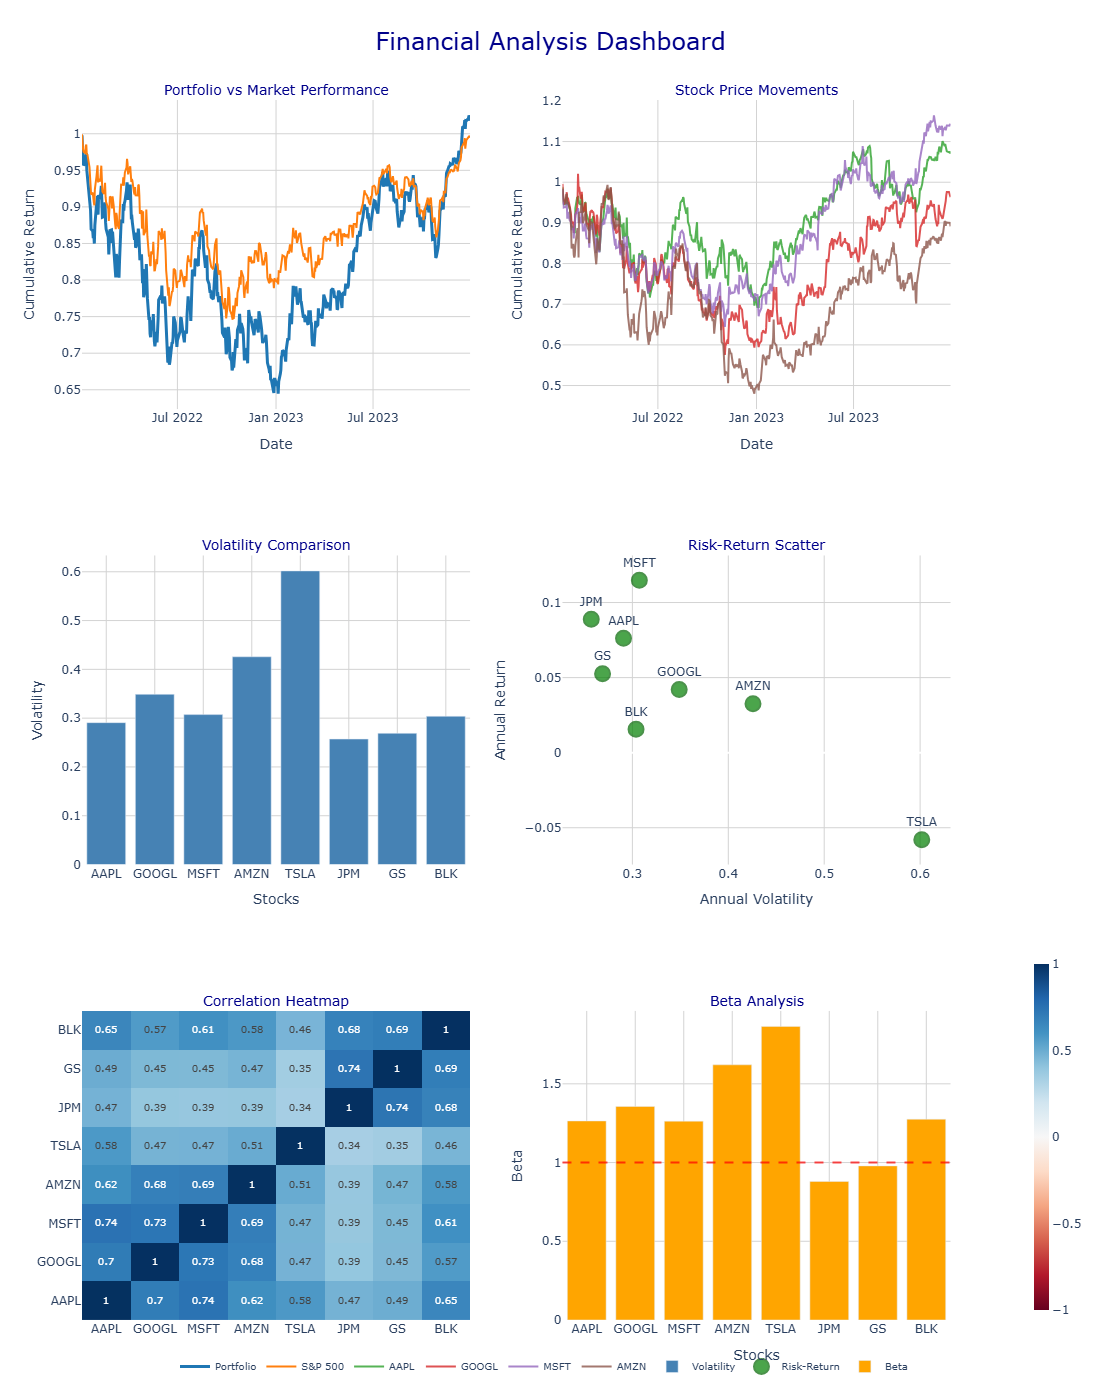

In [18]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px
import numpy as np

# Create comprehensive dashboard 
fig = make_subplots(
    rows=3, cols=2,
    subplot_titles=('Portfolio vs Market Performance', 'Stock Price Movements', 
                   'Volatility Comparison', 'Risk-Return Scatter', 
                   'Correlation Heatmap', 'Beta Analysis'),
    specs=[[{"secondary_y": True}, {"type": "scatter"}],
           [{"type": "bar"}, {"type": "scatter"}],
           [{"type": "heatmap"}, {"type": "bar"}]],
    
    vertical_spacing=0.12,
    horizontal_spacing=0.1
)

# 1. Portfolio vs Market Performance
portfolio_cumulative = (1 + portfolio_returns).cumprod()
market_cumulative = (1 + market_returns_aligned).cumprod()
fig.add_trace(
    go.Scatter(x=portfolio_cumulative.index, y=portfolio_cumulative.values,
               name='Portfolio', line=dict(color='#1f77b4', width=3),
               hovertemplate='<b>Portfolio</b><br>Date: %{x}<br>Value: %{y:.3f}<extra></extra>'),
    row=1, col=1
)
fig.add_trace(
    go.Scatter(x=market_cumulative.index, y=market_cumulative.values,
               name='S&P 500', line=dict(color='#ff7f0e', width=2),
               hovertemplate='<b>S&P 500</b><br>Date: %{x}<br>Value: %{y:.3f}<extra></extra>'),
    row=1, col=1
)

# 2. Individual Stock Performance 
colors = ['#2ca02c', '#d62728', '#9467bd', '#8c564b']
for i, ticker in enumerate(tickers[:4]):  # Show top 4 for clarity
    stock_cumulative = (1 + daily_returns[ticker]).cumprod()
    fig.add_trace(
        go.Scatter(x=stock_cumulative.index, y=stock_cumulative.values,
                   name=ticker, opacity=0.8, line=dict(color=colors[i], width=2),
                   hovertemplate=f'<b>{ticker}</b><br>Date: %{{x}}<br>Value: %{{y:.3f}}<extra></extra>'),
        row=1, col=2
    )

# 3. Volatility Bar Chart
fig.add_trace(
    go.Bar(x=list(volatility.index), y=list(volatility.values),
           name='Volatility', marker_color='steelblue',
           hovertemplate='<b>%{x}</b><br>Volatility: %{y:.4f}<extra></extra>'),
    row=2, col=1
)

# 4. Risk-Return Scatter
fig.add_trace(
    go.Scatter(x=annual_volatilities.values, y=annual_returns.values,
               mode='markers+text',
               text=list(annual_returns.index),
               textposition='top center',
               name='Risk-Return',
               marker=dict(size=15, color='green', opacity=0.7,
                          line=dict(width=2, color='darkgreen')),
               hovertemplate='<b>%{text}</b><br>Volatility: %{x:.3f}<br>Return: %{y:.3f}<extra></extra>'),
    row=2, col=2
)

# 5. Correlation Heatmap
correlation_matrix = daily_returns.corr()
fig.add_trace(
    go.Heatmap(
        z=correlation_matrix.values,
        x=correlation_matrix.columns,
        y=correlation_matrix.index,
        colorscale='RdBu',
        zmid=0,
        text=np.round(correlation_matrix.values, 2),
        texttemplate="%{text}",
        textfont={"size": 10},
        hovertemplate='<b>%{y} vs %{x}</b><br>Correlation: %{z:.3f}<extra></extra>',
        name='Correlation',
        colorbar=dict(thickness=15, len=0.3, y=0.15)  # Adjust colorbar
    ),
    row=3, col=1
)

# 6. Beta Bar Chart
fig.add_trace(
    go.Bar(x=list(betas.keys()), y=list(betas.values()),
           name='Beta', marker_color='orange',
           hovertemplate='<b>%{x}</b><br>Beta: %{y:.3f}<extra></extra>'),
    row=3, col=2
)


fig.update_layout(
    height=1400, 
    width=1200,   
    title_text="Financial Analysis Dashboard",
    title_x=0.5,
    title_font=dict(size=24, color='darkblue'),
    showlegend=True,
    legend=dict(
        orientation="h",
        yanchor="bottom",
        y=-0.05,
        xanchor="center",
        x=0.5,
        font=dict(size=10)
    ),
    # Improve overall appearance
    plot_bgcolor='white',
    paper_bgcolor='white'
)


for annotation in fig['layout']['annotations']:
    annotation['font'] = dict(size=14, color='darkblue')


# Portfolio vs Market
fig.update_xaxes(title_text="Date", row=1, col=1, showgrid=True, gridwidth=1, gridcolor='lightgray')
fig.update_yaxes(title_text="Cumulative Return", row=1, col=1, showgrid=True, gridwidth=1, gridcolor='lightgray')

# Stock movements
fig.update_xaxes(title_text="Date", row=1, col=2, showgrid=True, gridwidth=1, gridcolor='lightgray')
fig.update_yaxes(title_text="Cumulative Return", row=1, col=2, showgrid=True, gridwidth=1, gridcolor='lightgray')

# Volatility
fig.update_xaxes(title_text="Stocks", row=2, col=1, showgrid=True, gridwidth=1, gridcolor='lightgray')
fig.update_yaxes(title_text="Volatility", row=2, col=1, showgrid=True, gridwidth=1, gridcolor='lightgray')

# Risk-Return
fig.update_xaxes(title_text="Annual Volatility", row=2, col=2, showgrid=True, gridwidth=1, gridcolor='lightgray')
fig.update_yaxes(title_text="Annual Return", row=2, col=2, showgrid=True, gridwidth=1, gridcolor='lightgray')

# Heatmap - clean axes
fig.update_xaxes(title_text="", row=3, col=1, showgrid=False)
fig.update_yaxes(title_text="", row=3, col=1, showgrid=False)

# Beta
fig.update_xaxes(title_text="Stocks", row=3, col=2, showgrid=True, gridwidth=1, gridcolor='lightgray')
fig.update_yaxes(title_text="Beta", row=3, col=2, showgrid=True, gridwidth=1, gridcolor='lightgray')

# Add reference line for Beta = 1
fig.add_hline(y=1, line_dash="dash", line_color="red", opacity=0.7, row=3, col=2)


fig.show()

# Save as HTML
fig.write_html("financial_dashboard.html")


## 📋 Executive Summary & Risk Report
### Generating automated executive summary with key findings and investment recommendations. Professional reporting format suitable for investment committees and stakeholder presentations.

In [19]:
# Create executive summary
print("="*80)
print("📈 EXECUTIVE SUMMARY - FINANCIAL ANALYSIS PROJECT")
print("="*80)

print(f"\n🎯 PORTFOLIO OVERVIEW:")
print(f"   • Total Assets Analyzed: {len(tickers)} stocks")
print(f"   • Analysis Period: {start_date} to {end_date}")
print(f"   • Portfolio Strategy: Equal-weighted diversification")

print(f"\n📊 PERFORMANCE METRICS:")
print(f"   • Portfolio Annual Return: {portfolio_annual_return:.2%}")
print(f"   • Portfolio Annual Volatility: {portfolio_annual_volatility:.2%}")
print(f"   • Sharpe Ratio: {sharpe_ratio:.3f}")
print(f"   • Portfolio Beta: {portfolio_beta:.3f}")

print(f"\n🏆 TOP PERFORMERS:")
top_performers = annual_returns.nlargest(3)
for i, (ticker, ret) in enumerate(top_performers.items(), 1):
    print(f"   {i}. {ticker}: {ret:.2%} annual return")

print(f"\n⚠️  RISK ANALYSIS:")
highest_vol = annual_volatilities.nlargest(2)
for ticker, vol in highest_vol.items():
    print(f"   • {ticker}: {vol:.2%} volatility (High Risk)")

print(f"\n🔗 DIVERSIFICATION:")
avg_correlation = correlation_matrix.mean().mean()
print(f"   • Average Stock Correlation: {avg_correlation:.3f}")
if avg_correlation < 0.5:
    print("   • Portfolio is well-diversified")
elif avg_correlation < 0.7:
    print("   • Portfolio has moderate diversification")
else:
    print("   • Portfolio may need better diversification")

print(f"\n💡 INVESTMENT RECOMMENDATIONS:")
print("   1. Rebalance portfolio quarterly to maintain equal weights")
print("   2. Consider reducing allocation to highest volatility stocks")
print("   3. Monitor sector rotation opportunities")
print("   4. Use beta analysis to adjust portfolio risk based on market outlook")

print("\n" + "="*80)


📈 EXECUTIVE SUMMARY - FINANCIAL ANALYSIS PROJECT

🎯 PORTFOLIO OVERVIEW:
   • Total Assets Analyzed: 8 stocks
   • Analysis Period: 2022-01-01 to 2024-01-01
   • Portfolio Strategy: Equal-weighted diversification

📊 PERFORMANCE METRICS:
   • Portfolio Annual Return: 4.56%
   • Portfolio Annual Volatility: 27.14%
   • Sharpe Ratio: 0.168
   • Portfolio Beta: 1.313

🏆 TOP PERFORMERS:
   1. MSFT: 11.48% annual return
   2. JPM: 8.89% annual return
   3. AAPL: 7.62% annual return

⚠️  RISK ANALYSIS:
   • TSLA: 60.17% volatility (High Risk)
   • AMZN: 42.57% volatility (High Risk)

🔗 DIVERSIFICATION:
   • Average Stock Correlation: 0.605
   • Portfolio has moderate diversification

💡 INVESTMENT RECOMMENDATIONS:
   1. Rebalance portfolio quarterly to maintain equal weights
   2. Consider reducing allocation to highest volatility stocks
   3. Monitor sector rotation opportunities
   4. Use beta analysis to adjust portfolio risk based on market outlook



# 🎓 Technical Skills Demonstrated

## Quantitative Finance Concepts:

#### - Modern Portfolio Theory & Optimization
#### - Capital Asset Pricing Model (CAPM)
#### - Volatility Modeling & Risk Analytics
#### - Technical Analysis & Trend Identification
#### - Sector Rotation & Performance Attribution

## Technical Implementation:

#### - Python: pandas, numpy, scipy, matplotlib, plotly
#### - Statistical Analysis: Regression, correlation, time series
#### - Data Engineering: API integration, data cleaning, validation
#### - Visualization: Interactive dashboards, professional reporting

## Professional Applications:

#### - Portfolio risk management and optimization
#### - Systematic investment strategy development
#### - Client reporting and executive presentations
#### - Regulatory compliance and risk measurement